In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
votedata = pd.read_csv('~/Downloads/vote_data.csv')
votedata

,Party,Election,Votes
0,Party1,1,3
1,Party2,1,2
2,Party3,1,5
3,Party1,2,3
4,Party2,2,5
5,Party1,3,3
6,Party2,3,6


### There's probably a pandas function to do this, but we can iterate through the unique values to fill the votes with zeros when necessary.

In [45]:
for election in votedata['Election'].unique():
    for party in votedata['Party'].unique():
        print("%d -- %s" % (election, party))
        #print(votedata.loc[election].loc[(votedata['Party'] == party)])
        if (votedata.loc[(votedata['Election'] == election) & (votedata['Party']==party)]).empty:
            #create a new temp data frame with zeros in it
            tmpdata = pd.DataFrame([[party,election,0]], columns=('Party','Election','Votes'))
            votedata = votedata.append(tmpdata)
        

1 -- Party1
1 -- Party2
1 -- Party3
2 -- Party1
2 -- Party2
2 -- Party3
3 -- Party1
3 -- Party2
3 -- Party3


In [46]:
votedata

,Party,Election,Votes
0,Party1,1,3
1,Party2,1,2
2,Party3,1,5
3,Party1,2,3
4,Party2,2,5
5,Party1,3,3
6,Party2,3,6
0,Party3,2,0
0,Party3,3,0


## Now plot the data in a stacked chart

[0. 0. 0.]
<PandasArray>
[3.0, 3.0, 3.0]
Length: 3, dtype: float64
<PandasArray>
[5.0, 8.0, 9.0]
Length: 3, dtype: float64
<PandasArray>
[10.0, 8.0, 9.0]
Length: 3, dtype: float64


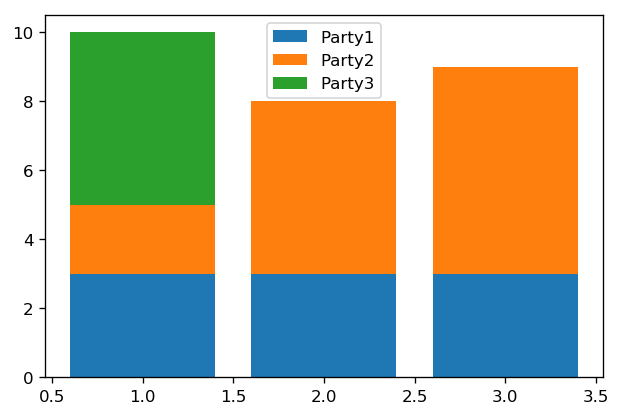

In [57]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
parties = votedata['Party'].unique()
bottom = np.zeros(len(parties))
print(bottom)
for party in parties:
    thisDF = votedata.loc[ votedata['Party'] == party]
    plt.bar(thisDF['Election'],thisDF['Votes'],bottom=bottom,label=party)
    bottom = bottom + thisDF['Votes'].array
    print(bottom)
ax.legend()